**Predicción de los sitios de localización celular de las proteínas usando técnicas de aprendizaje automático**

Autores:
*   César Delgado - 20151821@aloe.ulima.edu.pe
*   Javier Guevara - 20160650@aloe.ulima.edu.pe

Curso: Machine Learning

Sección: 802

Docente: Juan Gutierrez

Universidad de Lima

In [ ]:
#Instalar paquetes
#pip install imbalanced-learn

In [1]:
#Importar librerias
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_validate

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Importar dataset
drive.mount('/content/drive')
dataset = pd.read_fwf("/content/drive/My Drive/Colab Notebooks/yeast.data", header=None)
dataset

Mounted at /content/drive


,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [3]:
#Variables independientes
x = dataset[[1,2,3,4,5,6,7,8]]
#Convertir la variable dependiente en numeros
y = LabelEncoder().fit_transform(dataset[9])
#Divir los datos en entrenamiento y prueba (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
#Crear y entrenar modelo Decision Tree
model1 = DecisionTreeClassifier(max_depth=12).fit(x_train, y_train)
#Visualizar el accuracy del modelo con los datos de entrenamiento
print("Accuracy Entrenamiento: ", accuracy_score(y_train, model1.predict(x_train)))
#Visualizar el accuracy del modelo con los datos de prueba
print("Accuracy Prueba: ", accuracy_score(y_test, model1.predict(x_test)))

Accuracy Entrenamiento:  0.8559393428812131
Accuracy Prueba:  0.531986531986532


In [14]:
#Crear y entrenar modelo Random Forest
model2 = RandomForestClassifier(max_depth=12).fit(x_train, y_train)
#Visualizar el accuracy del modelo con los datos de entrenamiento
print("Accuracy Entrenamiento: ", accuracy_score(y_train, model2.predict(x_train)))
#Visualizar el accuracy del modelo con los datos de prueba
print("Accuracy Prueba: ", accuracy_score(y_test, model2.predict(x_test)))

Accuracy Entrenamiento:  0.966792656587473
Accuracy Prueba:  0.8995680345572354


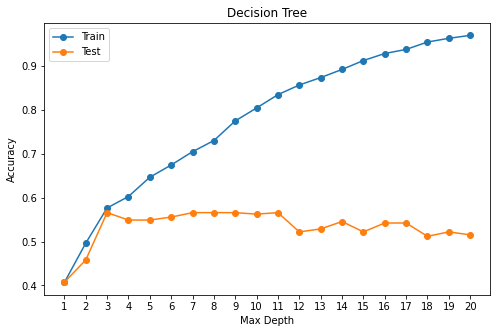

In [6]:
accuracy_train = []
accuracy_test = []
maxdepth = list(range(1, 21))

#Crear modelo para cada maxdepth
for i in maxdepth:
    model = DecisionTreeClassifier(max_depth=i).fit(x_train, y_train)
    #Agregar accuracy a la lista para despues graficarlo
    accuracy_train.append(accuracy_score(y_train, model.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test, model.predict(x_test)))

#Graficar los resultados
plt.figure(figsize=(8,5))
plt.plot(maxdepth, accuracy_train, 'o-', label="Train")
plt.plot(maxdepth, accuracy_test, 'o-', label="Test")
plt.xticks(maxdepth)
plt.title('Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

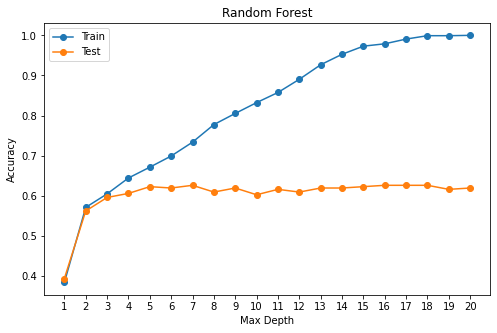

In [7]:
accuracy_train = []
accuracy_test = []
maxdepth = list(range(1, 21))

#Crear modelo para cada maxdepth
for i in maxdepth:
    model = RandomForestClassifier(max_depth=i).fit(x_train, y_train)
    #Agregar accuracy a la lista para despues graficarlo
    accuracy_train.append(accuracy_score(y_train, model.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test, model.predict(x_test)))

#Graficar los resultados
plt.figure(figsize=(8,5))
plt.plot(maxdepth, accuracy_train, 'o-', label="Train")
plt.plot(maxdepth, accuracy_test, 'o-', label="Test")
plt.xticks(maxdepth)
plt.title('Random Forest')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
#Crear Principal Component Analysis con n_components=2
pca = PCA(2)
#Nuevo dataset con 2 dimensiones
dataset2 = pca.fit_transform(x)

In [6]:
#Metodo Elbow
inercia = []
clusters = [1,2,3,4,5,6,7,8,9,10]
#Ejecutar K-Means para cada cantidad de clusters
for k in clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dataset2)
    inercia.append(kmeans.inertia_)

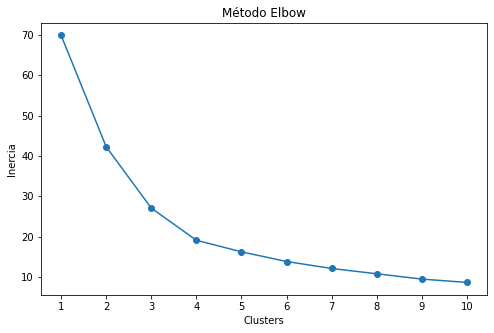

In [7]:
#Graficar el metodo Elbow
plt.figure(figsize=(8,5))
plt.plot(clusters, inercia, 'o-')
plt.xticks(clusters)
plt.title('Método Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inercia')
plt.show()

In [8]:
#Crear el modelo K-Means con 4 clusters
kmeans = KMeans(4)
#Entrenar el modelo con los datos PCA
kmeans.fit(dataset2)
#Asignar las etiquetas
labels = kmeans.labels_
#Asignar los centroides
centroids = kmeans.cluster_centers_

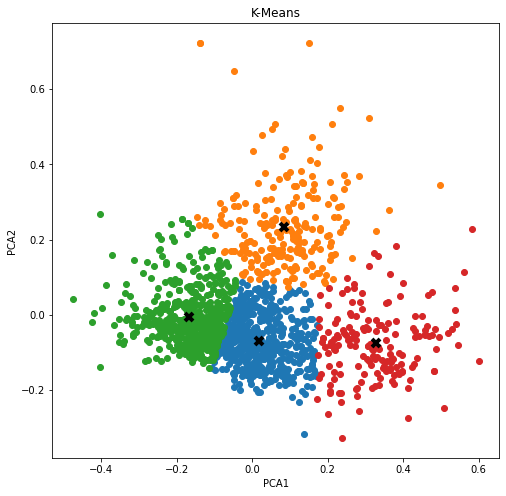

In [9]:
plt.figure(figsize=(8,8))
#Para cada cluster
for i in range(4):
    #Seleccionar solo los datos del cluster "i"
    ds = dataset2[np.where(labels==i)]
    #Graficar cada observacion
    plt.plot(ds[:,0], ds[:,1], 'o')
    #Graficar losc centroides
    lines = plt.plot(centroids[i,0], centroids[i,1], 'kx')
    #Modificar el tamaño y grosor del centroide
    plt.setp(lines,ms=8.0)
    plt.setp(lines,mew=4.0)

#Graficar K-Means
plt.title('K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [8]:
#Crear metodo de sobremuestreo
ros = RandomOverSampler()
#Ejecutar el sobremuestreo
x1, y1 = ros.fit_resample(x, y)
#Divir los datos en entrenamiento y prueba (80/20)
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [9]:
#Crear y entrenar el nuevo modelo Random Forest
model3 = RandomForestClassifier(max_depth=12).fit(x_train, y_train)
#Visualizar el accuracy del modelo con los datos de entrenamiento
print("Accuracy Entrenamiento: ", accuracy_score(y_train, model3.predict(x_train)))
#Visualizar el accuracy del modelo con los datos de prueba
print("Accuracy Prueba: ", accuracy_score(y_test, model3.predict(x_test)))

Accuracy Entrenamiento:  0.9670626349892009
Accuracy Prueba:  0.896328293736501


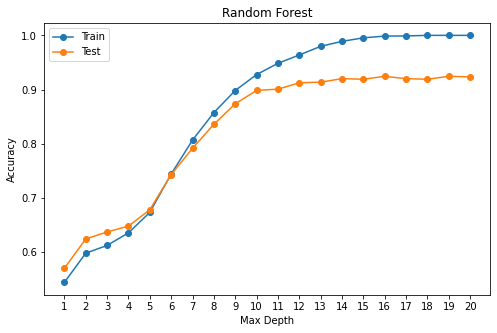

In [12]:
accuracy_train = []
accuracy_test = []
maxdepth = list(range(1, 21))

#Crear modelo para cada maxdepth
for i in maxdepth:
    model = RandomForestClassifier(max_depth=i).fit(x_train, y_train)
    #Agregar accuracy a la lista para despues graficarlo
    accuracy_train.append(accuracy_score(y_train, model.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test, model.predict(x_test)))

#Graficar los resultados
plt.figure(figsize=(8,5))
plt.plot(maxdepth, accuracy_train, 'o-', label="Train")
plt.plot(maxdepth, accuracy_test, 'o-', label="Test")
plt.xticks(maxdepth)
plt.title('Random Forest')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
#Cross Validation con 5 k-folds
model = RandomForestClassifier(max_depth=12)
cv = cross_validate(model, x1, y1, cv=5)
print(cv['test_score'])
print('Promedio: {0: .3f} +/- {1: .3f}'.format(cv['test_score'].mean(), cv['test_score'].std()))

[0.89524838 0.87580994 0.88984881 0.89632829 0.91036717]
Promedio:  0.894 +/-  0.011


In [11]:
#Cross Validation con 10 k-folds
model = RandomForestClassifier(max_depth=12)
cv = cross_validate(model, x1, y1, cv=10)
print(cv['test_score'])
print('Promedio: {0: .3f} +/- {1: .3f}'.format(cv['test_score'].mean(), cv['test_score'].std()))

[0.88768898 0.91360691 0.8812095  0.8812095  0.89200864 0.89416847
 0.87473002 0.90712743 0.9049676  0.92440605]
Promedio:  0.896 +/-  0.015


In [12]:
#Ejecutar el informe de clasificación
print(classification_report(y_test, model3.predict(x_test)))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58        81
           1       1.00      1.00      1.00        89
           2       0.99      1.00      0.99        97
           3       1.00      1.00      1.00       102
           4       0.97      1.00      0.98        84
           5       0.88      0.95      0.92        85
           6       0.83      0.82      0.82        93
           7       0.72      0.56      0.63       101
           8       1.00      1.00      1.00        94
           9       0.99      1.00      1.00       100

    accuracy                           0.90       926
   macro avg       0.89      0.90      0.89       926
weighted avg       0.90      0.90      0.89       926



Text(51.0, 0.5, 'Valores reales')

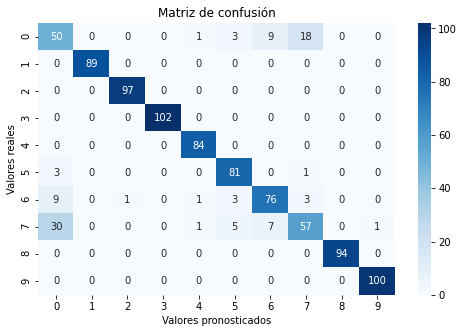

In [13]:
#Ejecutar la matriz de confusión
import seaborn as sns
plt.figure(figsize = (8,5))
plt.title('Matriz de confusión')
sns.heatmap(confusion_matrix(y_test, model3.predict(x_test)), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Valores pronosticados')
plt.ylabel('Valores reales')